In [ ]:
##### Policy with K=[5,10,50] arms, T=[10000,50000]

import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import beta 
import scipy.stats as sst
import scipy.optimize
import scipy.special
import scipy.integrate as integrate
import time
import pandas as pd
from pathlib import Path

%run eTS_alg_file_poisson.py
%run e_const_TS_alg_file_poisson.py
%run eTS_finiteDecay_alg_file_poisson.py
%run e_third_TS_alg_file_poisson.py
%run thompson_sampling_alg_file_poisson.py

##########################################################################

##########################################################################


# hz = 10000 #int(input('Enter the horizon : '))
for hz in [10000,50000]:
    for num_arms in [5,10,50]:
        horizon = range(hz)
        
        tot_seed_vals = 1
        seed_values = range(0,tot_seed_vals)
        # tot_seed_vals = np.size(seed_values)
        
        num_models = 1000 #int(input('Enter the #models : '))#4
        # num_arms = 5 #int(input('Enter the #arms : '))
        #arms_instances_file = open('i-3.txt','r')
        #arms_instances = np.loadtxt(arms_instances_file)
        
        alg_names_to_run =  ['thom_samp_alg','eTS_alg','eTS_finiteDecay_alg','e_third_TS_alg','e_const_TS_alg']
        
        model_chosen_to_run = range(num_models)
        
        for alg_name in alg_names_to_run:
            parent_folder_name = "horizon_" + str(hz)+ "_arms_" + str(num_arms) + "_seed_" + str(tot_seed_vals) + "_models_" + str(len(model_chosen_to_run))
            folder_name = Path(parent_folder_name, alg_name)
            folder_name.mkdir(parents=True, exist_ok=True)
            
            model_df = pd.DataFrame(model_chosen_to_run)
            model_df.to_csv(parent_folder_name + "/model_list.csv")
        
        
        model = np.zeros((num_models,num_arms))
        # opt_arms = np.zeros(num_models,dtype=int)
        
        for m in range(num_models):
            np.random.seed(m*9)
            model[m] = np.random.random(num_arms)
            if num_arms == 5:
                model[0] = np.array([0.1,0.2,0.3,0.4,0.5])#,0.3,0.4,0.5,0.6,0.7,0.8,0.55,0.65])# arms_instances
            elif num_arms == 10:
                # model[0] = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.55,0.45])
                model[0] = np.array([0.9,0.8,0.8,0.8,0.8, 0.8,0.8,0.8,0.8,0.8])
            elif num_arms == 50:
                model[0] = np.array([0.9,0.8,0.8,0.8,0.8, 0.8,0.8,0.8,0.8,0.8,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5])
        # 
            elif num_arms == 100:
                # model[0] = np.linspace(0.9,0.1,num_arms)
                model[0] = np.array([0.75,0.65,0.65,0.65,0.65, 0.65,0.65,0.65,0.65,0.65,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5])
            elif num_arms == 500:
                model[0] = np.ones(num_arms)
                model[0,0] = 0.75
                model[0,1:num_arms-1] = 0.25
            
            # elif num_arms == 500:
            #     model[0] = np.linspace(0.9,0.1,num_arms)
            
            # opt_arms[m] = np.argmax(model[m])
            #print(m,model[m])
        
        model_means_df = pd.DataFrame(model)
        model_means_df.to_csv(parent_folder_name + "/model_means_list.csv")
        
        max_means = np.reshape(np.max(model,1),(num_models,1))*np.ones((num_models,num_arms))
        # optimal_model_arms = (model >= max_means ) + 0
        
        # model_chosen_to_run = [0]#
        # model_chosen_to_run = range(num_models)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
        # model_chosen_to_run = [0,7,8,9,10,11,12,13]
        
        regret_TS_model_list = []
        regret_TS_new_model_list = []
        regret_TS_copies_model_list = []
        regret_randomized_TS_finite_hori_model_list = []
        regret_randomized_ucb_range_model_list = []
        regret_randomized_ucb_model_list = []
        regret_ucb_model_list = []
        regret_TS_finite_hori_model_list = []
        regret_seed_TS_finite_hori_model_list = []
        
        regret_seed_TS_model_list = []
        regret_seed_TS_new_model_list = []
        regret_seed_TS_copies_model_list = []
        regret_seed_2norm_model_list = []
        regret_seed_TS_Greedy_model_list = []
        regret_seed_TS_ucb_model_list = []
        regret_seed_TS_decay_Greedy_model_list = []
        regret_seed_TS_decay_greedy_knownT_model_list = []
        regret_seed_TS_greedy_decay_knownT_model_list = []
        regret_seed_randomized_ucb_model_list = []
        
        regret_eTS_model_list = []
        regret_seed_eTS_model_list = []
        regret_e_const_TS_model_list = []
        regret_seed_e_const_TS_model_list = []
        
        regret_eTS_finiteDecay_model_list = []
        regret_seed_eTS_finiteDecay_model_list = []
        
        regret_e_third_TS_model_list = []
        regret_seed_e_third_TS_model_list = []
        
        for generic in alg_names_to_run:
        
            num_models_run = 0
            rewards_every_step_generic = np.zeros((num_models,hz))
            rewards_every_step_arms_generic = np.zeros((num_models,hz))
            rewards_every_step_generic_model = np.zeros((num_models,hz))
            hor_names = [str(i) for i in range(hz)]
            # avg_arms_sampled_generic = np.zeros((num_models,hz,num_arms))
            # avg_opt_arms_sampled_generic = np.zeros(hz)
        
            for model_chosen in model_chosen_to_run:#range(num_models):
            
                #model_chosen = 6
                num_models_run = num_models_run + 1
                arms = model[model_chosen]
                num_arms = len(arms)
                p_max = np.max(arms)
                best_rew = hz*p_max
                max_arm_ind = np.where(arms == p_max)[0][0]
                # print(arms,max_arm_ind)
                
                data_generic = np.zeros((tot_seed_vals,hz,num_arms))
                data_generic = np.zeros((tot_seed_vals,hz))
                # arms_sampled_generic = np.zeros((tot_seed_vals,hz,num_arms))
                # regret_alg_generic = np.zeros(tot_seed_vals)
                regret_every_step_generic = np.zeros((1,hz))
                # regret_seed_time_generic = np.zeros((tot_seed_vals,hz))
        
                # regret_seed_generic = np.zeros((tot_seed_vals))
                
                regret_seed = np.zeros((tot_seed_vals,hz))
                
                if generic == 'thom_samp_alg':
        
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        seed = model_chosen
                            
                        (data_generic[count,:]) = thom_samp_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    #print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
            
                elif generic == 'eTS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        seed = model_chosen
        
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:])  = eTS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_arms_generic[model_chosen,:]  = rewards_every_step_arms_generic[model_chosen,:] + data_generic[count,:] #np.sum(data_generic[count,:,:],1)
                        # rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    #print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    # regret_eTS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - np.sum(rewards_every_step_arms_generic[model_chosen],1)/tot_seed_vals ] 
                    regret_eTS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_arms_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_eTS_model_list += [regret_seed]
                    
                    regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
        
                elif generic == 'eTS_finiteDecay_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        seed = model_chosen
        
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:])  = eTS_finiteDecay_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    #print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_eTS_finiteDecay_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_eTS_finiteDecay_model_list += [regret_seed]
        
                    regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
                    
                elif generic == 'e_const_TS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        seed = model_chosen
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:]) = e_const_TS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    #print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_e_const_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_e_const_TS_model_list += [regret_seed]
        
                    regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
                elif generic == 'e_third_TS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        seed = model_chosen
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:]) = e_third_TS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    #print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_e_third_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_e_third_TS_model_list += [regret_seed]
        
                    regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
        
        #######################################################################################
        
        algo_plot_pars = { 'TS' : ('C0','TS'),'eTS' : ('C6','$ \epsilon_t = 1/\log(\log(t))$'),
                          'e_const_TS' : ('C1','$ \epsilon_t = 1 - 1/K$'),
                          'eTS_finiteDecay' : ('C2','$ \epsilon_t = \sqrt{t/T} $'),
                          'e_third_TS' : ('C5','$ \epsilon_t = 1-1/3 $')} 
        
        
        # rewards_every_step_arms_ts = 0 
        # regret_every_step_arms_TS_ucb = 0
        # regret_every_step_arms_TS_Greedy= 0
        # regret_TS_decay_greedy_knownT = 0
        
        
        # num_models = len(regret_TS_new_model_list)
        # for model_chosen in range(num_models):
        #     rewards_every_step_arms_TS_finite_hori += regret_TS_finite_hori_model_list[model_chosen]/num_models
        #     rewards_every_step_arms_TS_new += regret_TS_new_model_list[model_chosen]/num_models
        #     rewards_every_step_arms_TS_copies += regret_TS_copies_model_list[model_chosen]/num_models
        
        fig, ax = pl.subplots()
        end_time = hz
        horizon = np.linspace(1,end_time,num=end_time,dtype=int)
        
        # regret_eTS_model_list)
        # regret_eTS_finiteDecay_model_list
        # regret_e_third_TS_model_list)
        # regret_e_const_TS_model_list)
        # regret_TS_model_list)
        
        num_models = len(regret_TS_model_list)
        if num_models:
            regret_every_step_arms_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_TS += regret_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_TS[0:end_time],color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
        
        num_models = len(regret_eTS_model_list)
        if num_models:
            regret_every_step_arms_eTS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_eTS += regret_eTS_model_list[model_chosen]/num_models
            # regret_every_step_arms_eTS = regret_eTS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_eTS[0:end_time],color=algo_plot_pars['eTS'][0],label=algo_plot_pars['eTS'][1])
        
        num_models = len(regret_eTS_finiteDecay_model_list)
        if num_models: 
            regret_every_step_arms_eTS_finiteDecay = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_eTS_finiteDecay += regret_eTS_finiteDecay_model_list[model_chosen]/num_models
            # regret_every_step_arms_eTS_finiteDecay = regret_eTS_finiteDecay_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_eTS_finiteDecay[0:end_time],color=algo_plot_pars['eTS_finiteDecay'][0],label=algo_plot_pars['eTS_finiteDecay'][1])
        
        num_models = len(regret_e_const_TS_model_list)
        if num_models:
            regret_every_step_arms_e_const_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_e_const_TS += regret_e_const_TS_model_list[model_chosen]/num_models
            # regret_every_step_arms_e_const_TS = regret_e_const_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_e_const_TS[0:end_time],color=algo_plot_pars['e_const_TS'][0],label=algo_plot_pars['e_const_TS'][1])
        
        num_models = len(regret_e_third_TS_model_list)
        if num_models:
            regret_every_step_arms_e_third_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_e_third_TS += regret_e_third_TS_model_list[model_chosen]/num_models
            # regret_every_step_arms_e_third_TS = regret_e_third_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_e_third_TS[0:end_time],color=algo_plot_pars['e_third_TS'][0],label=algo_plot_pars['e_third_TS'][1])
        
        ax.legend()
        ax.grid()
        ax.set_title('Regret, avg over '+ str(num_models)+ ' models, '  + str(num_arms) + ' arms')
        pl.savefig('regret_poisson_horizon_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(num_models) + '_models' + '.eps')
        # + str(num_models) +' models, '


Text(0.5, 1.0, 'Regret, avg over 1 models, 50 arms')

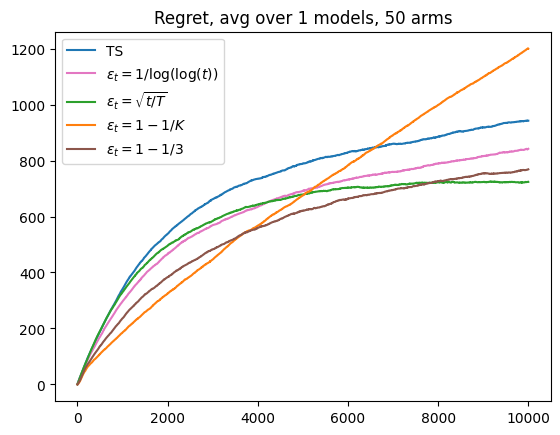

In [11]:
## plotting for K=10 arms
#\sqrt{t/T}
algo_plot_pars = { 'TS' : ('C0','TS'),'eTS' : ('C6','$ \epsilon_t = 1/\log(\log(t))$'),
                  'e_const_TS' : ('C1','$ \epsilon_t = 1 - 1/K$'),
                  'eTS_finiteDecay' : ('C2','$ \epsilon_t = \sqrt{t/T} $'),
                  'e_third_TS' : ('C5','$ \epsilon_t = 1-1/3 $')} 


# rewards_every_step_arms_ts = 0 
# regret_every_step_arms_TS_ucb = 0
# regret_every_step_arms_TS_Greedy= 0
# regret_TS_decay_greedy_knownT = 0


# num_models = len(regret_TS_new_model_list)
# for model_chosen in range(num_models):
#     rewards_every_step_arms_TS_finite_hori += regret_TS_finite_hori_model_list[model_chosen]/num_models
#     rewards_every_step_arms_TS_new += regret_TS_new_model_list[model_chosen]/num_models
#     rewards_every_step_arms_TS_copies += regret_TS_copies_model_list[model_chosen]/num_models

fig, ax = pl.subplots()
end_time = hz
horizon = np.linspace(1,end_time,num=end_time,dtype=int)

# regret_eTS_model_list)
# regret_eTS_finiteDecay_model_list
# regret_e_third_TS_model_list)
# regret_e_const_TS_model_list)
# regret_TS_model_list)

num_models = len(regret_TS_model_list)
if num_models:
    regret_every_step_arms_TS = 0
    for model_chosen in range(num_models):
        regret_every_step_arms_TS += regret_TS_model_list[model_chosen]/num_models
    ax.plot(horizon,regret_every_step_arms_TS[0:end_time],color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])

num_models = len(regret_eTS_model_list)
if num_models:
    regret_every_step_arms_eTS = 0
    for model_chosen in range(num_models):
        regret_every_step_arms_eTS += regret_eTS_model_list[model_chosen]/num_models
    # regret_every_step_arms_eTS = regret_eTS_model_list[model_chosen]/num_models
    ax.plot(horizon,regret_every_step_arms_eTS[0:end_time],color=algo_plot_pars['eTS'][0],label=algo_plot_pars['eTS'][1])

num_models = len(regret_eTS_finiteDecay_model_list)
if num_models: 
    regret_every_step_arms_eTS_finiteDecay = 0
    for model_chosen in range(num_models):
        regret_every_step_arms_eTS_finiteDecay += regret_eTS_finiteDecay_model_list[model_chosen]/num_models
    # regret_every_step_arms_eTS_finiteDecay = regret_eTS_finiteDecay_model_list[model_chosen]/num_models
    ax.plot(horizon,regret_every_step_arms_eTS_finiteDecay[0:end_time],color=algo_plot_pars['eTS_finiteDecay'][0],label=algo_plot_pars['eTS_finiteDecay'][1])

num_models = len(regret_e_const_TS_model_list)
if num_models:
    regret_every_step_arms_e_const_TS = 0
    for model_chosen in range(num_models):
        regret_every_step_arms_e_const_TS += regret_e_const_TS_model_list[model_chosen]/num_models
    # regret_every_step_arms_e_const_TS = regret_e_const_TS_model_list[model_chosen]/num_models
    ax.plot(horizon,regret_every_step_arms_e_const_TS[0:end_time],color=algo_plot_pars['e_const_TS'][0],label=algo_plot_pars['e_const_TS'][1])

num_models = len(regret_e_third_TS_model_list)
if num_models:
    regret_every_step_arms_e_third_TS = 0
    for model_chosen in range(num_models):
        regret_every_step_arms_e_third_TS += regret_e_third_TS_model_list[model_chosen]/num_models
    # regret_every_step_arms_e_third_TS = regret_e_third_TS_model_list[model_chosen]/num_models
    ax.plot(horizon,regret_every_step_arms_e_third_TS[0:end_time],color=algo_plot_pars['e_third_TS'][0],label=algo_plot_pars['e_third_TS'][1])

ax.legend()
ax.set_title('Regret, avg over '+ str(num_models)+ ' models, '  + str(num_arms) + ' arms')
# pl.savefig('eTS_econstTS_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(num_models) + '_models' + '.eps')
# + str(num_models) +' models, '


[1.  0.7 0.7 0.7 0.7] 0
Alg : e_third_TS_alg - Time taken for model 0 = 1.49 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : e_third_TS_alg - Time taken for model 1 = 1.45 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : e_const_TS_alg - Time taken for model 0 = 1.32 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : e_const_TS_alg - Time taken for model 1 = 1.31 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : eTS_alg - Time taken for model 0 = 1.85 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : eTS_alg - Time taken for model 1 = 1.86 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : eTS_finiteDecay_alg - Time taken for model 0 = 1.55 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : eTS_finiteDecay_alg - Time taken for model 1 = 1.54 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : thom_samp_alg - Time taken for model 0 = 2.21 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : thom_samp_alg - Time taken for model 1 = 2.20 mins


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : e_third_TS_alg - Time taken for model 0 = 1.47 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_third_TS_alg - Time taken for model 1 = 1.46 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : e_const_TS_alg - Time taken for model 0 = 1.17 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_const_TS_alg - Time taken for model 1 = 1.16 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : eTS_alg - Time taken for model 0 = 1.81 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : eTS_alg - Time taken for model 1 = 1.81 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : eTS_finiteDecay_alg - Time taken for model 0 = 1.52 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : eTS_finiteDecay_alg - Time taken for model 1 = 1.52 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : thom_samp_alg - Time taken for model 0 = 2.19 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] 0
Alg : e_third_TS_alg - Time taken for model 0 = 1.54 mins
[0.5  0.45 0.4  0.4  0.4  0.3  0.3  0.3  0.2  0.2  0.3  0.25 0.2  0.2
 0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15
 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25
 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_third_TS_alg - Time taken for model 1 = 1.53 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] 0
Alg : e_const_TS_alg - Time taken for model 0 = 1.07 mins
[0.5  0.45 0.4  0.4  0.4  0.3  0.3  0.3  0.2  0.2  0.3  0.25 0.2  0.2
 0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15
 0.1  0.1  0.3  0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.  0.7 0.7 0.7 0.7] 0
Alg : e_third_TS_alg - Time taken for model 0 = 7.48 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : e_third_TS_alg - Time taken for model 1 = 7.45 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : e_const_TS_alg - Time taken for model 0 = 6.61 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : e_const_TS_alg - Time taken for model 1 = 6.56 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : eTS_alg - Time taken for model 0 = 8.91 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : eTS_alg - Time taken for model 1 = 8.93 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : eTS_finiteDecay_alg - Time taken for model 0 = 7.68 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : eTS_finiteDecay_alg - Time taken for model 1 = 7.69 mins
[1.  0.7 0.7 0.7 0.7] 0
Alg : thom_samp_alg - Time taken for model 0 = 11.07 mins
[0.3 0.2 0.2 0.1 0.1] 0
Alg : thom_samp_alg - Time taken for model 1 = 11.00 mins


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : e_third_TS_alg - Time taken for model 0 = 7.54 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_third_TS_alg - Time taken for model 1 = 7.38 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : e_const_TS_alg - Time taken for model 0 = 5.95 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_const_TS_alg - Time taken for model 1 = 5.99 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : eTS_alg - Time taken for model 0 = 8.98 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : eTS_alg - Time taken for model 1 = 8.96 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : eTS_finiteDecay_alg - Time taken for model 0 = 7.75 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : eTS_finiteDecay_alg - Time taken for model 1 = 7.75 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7] 0
Alg : thom_samp_alg - Time taken for model 0 = 11.21 mins
[0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] 0
Alg : e_third_TS_alg - Time taken for model 0 = 7.98 mins
[0.5  0.45 0.4  0.4  0.4  0.3  0.3  0.3  0.2  0.2  0.3  0.25 0.2  0.2
 0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15
 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25
 0.2  0.2  0.2  0.15 0.15 0.15 0.1  0.1 ] 0
Alg : e_third_TS_alg - Time taken for model 1 = 7.92 mins
[1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] 0
Alg : e_const_TS_alg - Time taken for model 0 = 5.47 mins
[0.5  0.45 0.4  0.4  0.4  0.3  0.3  0.3  0.2  0.2  0.3  0.25 0.2  0.2
 0.2  0.15 0.15 0.15 0.1  0.1  0.3  0.25 0.2  0.2  0.2  0.15 0.15 0.15
 0.1  0.1  0.3  0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


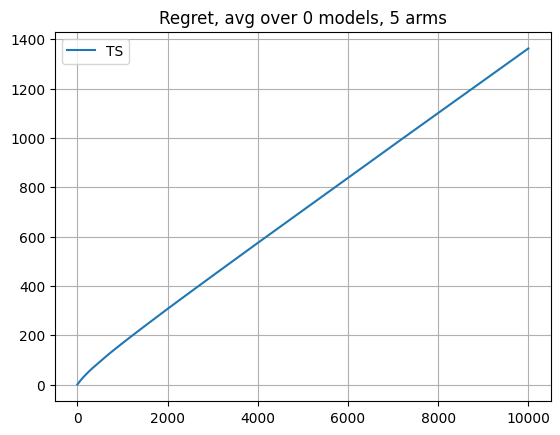

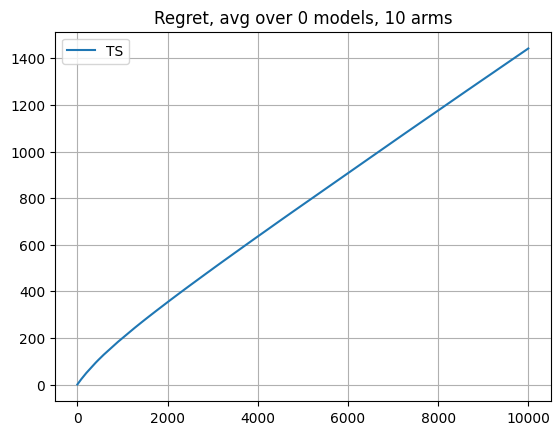

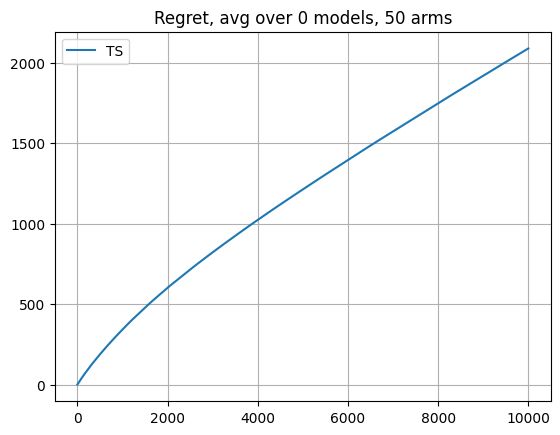

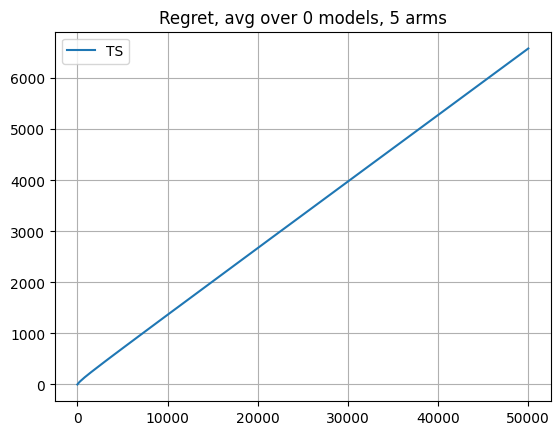

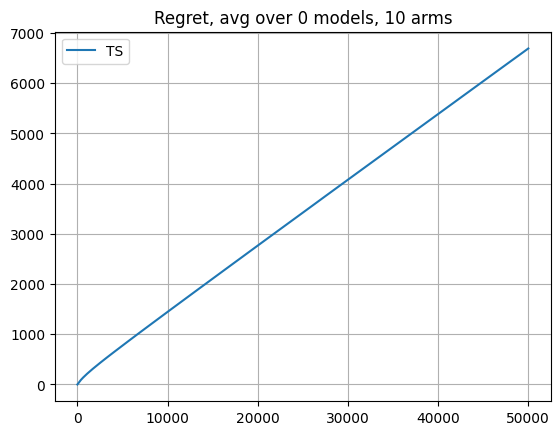

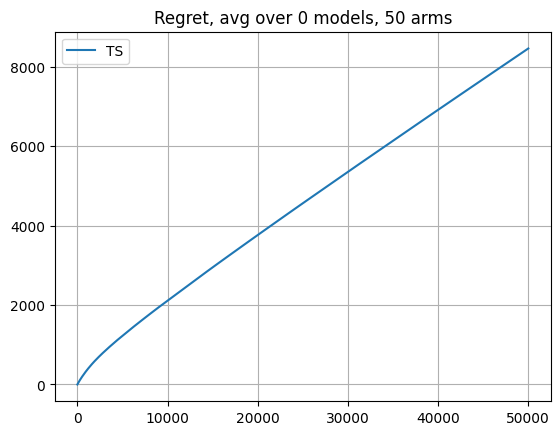

In [1]:
##### Policy with K=[5,10,50] arms, T=[10000,50000], seed = 1000, models = 2


import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import beta 
import scipy.stats as sst
import scipy.optimize
import scipy.special
import scipy.integrate as integrate
import time
import pandas as pd
from pathlib import Path

%run eTS_alg_file_poisson.py
%run e_const_TS_alg_file_poisson.py
%run eTS_finiteDecay_alg_file_poisson.py
%run e_third_TS_alg_file_poisson.py
%run thompson_sampling_alg_file_poisson.py

##########################################################################
##########################################################################

##########################################################################

# np.set_printoptions(precision=2,suppress=True)


# hz = 10000 #int(input('Enter the horizon : '))
for hz in [10000,50000]:
    for num_arms in [5,10,50]:
        horizon = range(hz)
        
        tot_seed_vals = 1000
        seed_values = range(0,tot_seed_vals)
        # tot_seed_vals = np.size(seed_values)
        
        num_models = 2 #int(input('Enter the #models : '))#4
        # num_arms = 5 #int(input('Enter the #arms : '))
        #arms_instances_file = open('i-3.txt','r')
        #arms_instances = np.loadtxt(arms_instances_file)
        
        alg_names_to_run = ['e_third_TS_alg','e_const_TS_alg','eTS_alg','eTS_finiteDecay_alg','thom_samp_alg']
        
        model_chosen_to_run = range(num_models)
        
        for alg_name in alg_names_to_run:
            parent_folder_name = "horizon_" + str(hz)+ "_arms_" + str(num_arms) + "_seed_" + str(tot_seed_vals) + "_models_" + str(len(model_chosen_to_run))
            folder_name = Path(parent_folder_name, alg_name)
            folder_name.mkdir(parents=True, exist_ok=True)
            
            model_df = pd.DataFrame(model_chosen_to_run)
            model_df.to_csv(parent_folder_name + "/model_list.csv")
        
        
        model = np.zeros((num_models,num_arms))
        # opt_arms = np.zeros(num_models,dtype=int)
        
        for m in range(num_models):
            np.random.seed(m*9)
            model[m] = np.random.random(num_arms)
            if num_arms == 5:
                model[0] = np.array([1,0.7,0.7,0.7,0.7])#,0.3,0.4,0.5,0.6,0.7,0.8,0.55,0.65])# arms_instances
                model[1] = np.array([0.3,0.2,0.2,0.1,0.1])
            elif num_arms == 10:
                # model[0] = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.55,0.45])
                model[0] = np.array([1,0.7,0.7,0.7,0.7, 0.7,0.7,0.7,0.7,0.7])
                model[1] = np.array([0.3,0.25,0.2,0.2,0.2, 0.15,0.15,0.15,0.1,0.1])
            elif num_arms == 50:
                model[0] = np.array([1,0.7,0.7,0.7,0.7, 0.7,0.7,0.7,0.7,0.7,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5])
                model[1] = np.array([0.5,0.45,0.4,0.4,0.4,  0.3,0.3,0.3,0.2,0.2,
                                    0.3,0.25,0.2,0.2,0.2, 0.15,0.15,0.15,0.1,0.1,
                                    0.3,0.25,0.2,0.2,0.2, 0.15,0.15,0.15,0.1,0.1,
                                    0.3,0.25,0.2,0.2,0.2, 0.15,0.15,0.15,0.1,0.1,
                                    0.3,0.25,0.2,0.2,0.2, 0.15,0.15,0.15,0.1,0.1])
         
            elif num_arms == 100:
                # model[0] = np.linspace(0.9,0.1,num_arms)
                model[0] = np.array([0.75,0.65,0.65,0.65,0.65, 0.65,0.65,0.65,0.65,0.65,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5,
                                    0.5,0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5,0.5])
            elif num_arms == 500:
                model[0] = np.ones(num_arms)
                model[0,0] = 0.75
                model[0,1:num_arms-1] = 0.25
            
            # elif num_arms == 500:
            #     model[0] = np.linspace(0.9,0.1,num_arms)
            
            # opt_arms[m] = np.argmax(model[m])
            #print(m,model[m])
        
        model_means_df = pd.DataFrame(model)
        model_means_df.to_csv(parent_folder_name + "/model_means_list.csv")
        
        max_means = np.reshape(np.max(model,1),(num_models,1))*np.ones((num_models,num_arms))
        # optimal_model_arms = (model >= max_means ) + 0
        
        # model_chosen_to_run = [0]#
        # model_chosen_to_run = range(num_models)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
        # model_chosen_to_run = [0,7,8,9,10,11,12,13]
        
        regret_TS_model_list = []
        regret_TS_new_model_list = []
        regret_TS_copies_model_list = []
        regret_randomized_TS_finite_hori_model_list = []
        regret_randomized_ucb_range_model_list = []
        regret_randomized_ucb_model_list = []
        regret_ucb_model_list = []
        regret_TS_finite_hori_model_list = []
        regret_seed_TS_finite_hori_model_list = []
        
        regret_seed_TS_model_list = []
        regret_seed_TS_new_model_list = []
        regret_seed_TS_copies_model_list = []
        regret_seed_2norm_model_list = []
        regret_seed_TS_Greedy_model_list = []
        regret_seed_TS_ucb_model_list = []
        regret_seed_TS_decay_Greedy_model_list = []
        regret_seed_TS_decay_greedy_knownT_model_list = []
        regret_seed_TS_greedy_decay_knownT_model_list = []
        regret_seed_randomized_ucb_model_list = []
        
        regret_eTS_model_list = []
        regret_seed_eTS_model_list = []
        regret_e_const_TS_model_list = []
        regret_seed_e_const_TS_model_list = []
        
        regret_eTS_finiteDecay_model_list = []
        regret_seed_eTS_finiteDecay_model_list = []
        
        regret_e_third_TS_model_list = []
        regret_seed_e_third_TS_model_list = []
        
        for generic in alg_names_to_run:
        
            num_models_run = 0
            rewards_every_step_generic = np.zeros((num_models,hz))
            rewards_every_step_arms_generic = np.zeros((num_models,hz))
            rewards_every_step_generic_model = np.zeros((num_models,hz))
            hor_names = [str(i) for i in range(hz)]
            # avg_arms_sampled_generic = np.zeros((num_models,hz,num_arms))
            # avg_opt_arms_sampled_generic = np.zeros(hz)
        
            for model_chosen in model_chosen_to_run:#range(num_models):
            
                #model_chosen = 6
                num_models_run = num_models_run + 1
                arms = model[model_chosen]
                num_arms = len(arms)
                p_max = np.max(arms)
                best_rew = hz*p_max
                max_arm_ind = np.where(arms == p_max)[0][0]
                print(arms,max_arm_ind)
                
                data_generic = np.zeros((tot_seed_vals,hz,num_arms))
                data_generic = np.zeros((tot_seed_vals,hz))
                # arms_sampled_generic = np.zeros((tot_seed_vals,hz,num_arms))
                # regret_alg_generic = np.zeros(tot_seed_vals)
                regret_every_step_generic = np.zeros((1,hz))
                # regret_seed_time_generic = np.zeros((tot_seed_vals,hz))
        
                # regret_seed_generic = np.zeros((tot_seed_vals))
                
                regret_seed = np.zeros((tot_seed_vals,hz))
                
                if generic == 'thom_samp_alg':

                    # print(generic)
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        #seed = model_chosen
                            
                        (data_generic[count,:]) = thom_samp_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        #print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    # regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    regret_df = pd.DataFrame(np.round(regret_seed,decimals=2))
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
            
                elif generic == 'eTS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        #seed = model_chosen
        
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:])  = eTS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_arms_generic[model_chosen,:]  = rewards_every_step_arms_generic[model_chosen,:] + data_generic[count,:] #np.sum(data_generic[count,:,:],1)
                        # rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        #print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    # regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    regret_df = pd.DataFrame(np.round(regret_seed,decimals=2))
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
        
                elif generic == 'eTS_finiteDecay_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        #seed = model_chosen
        
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:])  = eTS_finiteDecay_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        #print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    # regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    regret_df = pd.DataFrame(np.round(regret_seed,decimals=2))
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
                    
                elif generic == 'e_const_TS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        #seed = model_chosen
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:]) = e_const_TS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        #print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    # regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    regret_df = pd.DataFrame(np.round(regret_seed,decimals=2))
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
                elif generic == 'e_third_TS_alg':
                    time_taken = np.zeros((tot_seed_vals))   
                    time_start = time.process_time()
                    for count,seed in zip(range(tot_seed_vals),seed_values): #seed_values:
                        #seed = model_chosen
                        # (data_generic[count,:,:],arms_sampled_generic[count,:,:]) = randomized_ucb_alg(model[model_chosen],seed,hz)
                        (data_generic[count,:]) = e_third_TS_alg(model[model_chosen],seed,hz)
                        rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                        # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
            
                        regret_seed[count,:] = p_max*np.linspace(1,hz,num=hz,dtype=int) - data_generic[count,:]
                         
                        #print(f'{seed}, {regret_seed[count,hz-1]:0.2f}, {generic}')
                        
                        time_taken[count] = time.process_time() 
                    print(f'Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.2f} mins')
            
                    regret_TS_model_list +=  [p_max*np.linspace(1,hz,num=hz,dtype=int) - rewards_every_step_generic[model_chosen]/tot_seed_vals ] 
                    
                    regret_seed_TS_model_list += [regret_seed]
        
                    # regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
                    regret_df = pd.DataFrame(np.round(regret_seed,decimals=2))
                    csv_file_name  = Path(parent_folder_name,generic,"regret_" + generic + "_model_" + str(model_chosen) + ".csv")
                    regret_df.to_csv(csv_file_name)
        
        
        #######################################################################################
        
        algo_plot_pars = { 'TS' : ('C0','TS'),'eTS' : ('C6','$ \epsilon_t = 1/\log(\log(t))$'),
                          'e_const_TS' : ('C1','$ \epsilon_t = 1 - 1/K$'),
                          'eTS_finiteDecay' : ('C2','$ \epsilon_t = \sqrt{t/T} $'),
                          'e_third_TS' : ('C5','$ \epsilon_t = 1-1/3 $')} 
        
        
        # rewards_every_step_arms_ts = 0 
        # regret_every_step_arms_TS_ucb = 0
        # regret_every_step_arms_TS_Greedy= 0
        # regret_TS_decay_greedy_knownT = 0
        
        
        # num_models = len(regret_TS_new_model_list)
        # for model_chosen in range(num_models):
        #     rewards_every_step_arms_TS_finite_hori += regret_TS_finite_hori_model_list[model_chosen]/num_models
        #     rewards_every_step_arms_TS_new += regret_TS_new_model_list[model_chosen]/num_models
        #     rewards_every_step_arms_TS_copies += regret_TS_copies_model_list[model_chosen]/num_models
        
        fig, ax = pl.subplots()
        end_time = hz
        horizon = np.linspace(1,end_time,num=end_time,dtype=int)
        
        # regret_eTS_model_list)
        # regret_eTS_finiteDecay_model_list
        # regret_e_third_TS_model_list)
        # regret_e_const_TS_model_list)
        # regret_TS_model_list)
        
        num_models = len(regret_TS_model_list)
        if num_models:
            regret_every_step_arms_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_TS += regret_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_TS[0:end_time],color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
        
        num_models = len(regret_eTS_model_list)
        if num_models:
            regret_every_step_arms_eTS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_eTS += regret_eTS_model_list[model_chosen]/num_models
            # regret_every_step_arms_eTS = regret_eTS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_eTS[0:end_time],color=algo_plot_pars['eTS'][0],label=algo_plot_pars['eTS'][1])
        
        num_models = len(regret_eTS_finiteDecay_model_list)
        if num_models: 
            regret_every_step_arms_eTS_finiteDecay = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_eTS_finiteDecay += regret_eTS_finiteDecay_model_list[model_chosen]/num_models
            # regret_every_step_arms_eTS_finiteDecay = regret_eTS_finiteDecay_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_eTS_finiteDecay[0:end_time],color=algo_plot_pars['eTS_finiteDecay'][0],label=algo_plot_pars['eTS_finiteDecay'][1])
        
        num_models = len(regret_e_const_TS_model_list)
        if num_models:
            regret_every_step_arms_e_const_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_e_const_TS += regret_e_const_TS_model_list[model_chosen]/num_models
            # regret_every_step_arms_e_const_TS = regret_e_const_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_e_const_TS[0:end_time],color=algo_plot_pars['e_const_TS'][0],label=algo_plot_pars['e_const_TS'][1])
        
        num_models = len(regret_e_third_TS_model_list)
        if num_models:
            regret_every_step_arms_e_third_TS = 0
            for model_chosen in range(num_models):
                regret_every_step_arms_e_third_TS += regret_e_third_TS_model_list[model_chosen]/num_models
            # regret_every_step_arms_e_third_TS = regret_e_third_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_every_step_arms_e_third_TS[0:end_time],color=algo_plot_pars['e_third_TS'][0],label=algo_plot_pars['e_third_TS'][1])
        
        ax.legend()
        ax.grid()
        ax.set_title('Regret, avg over '+ str(num_models)+ ' models, '  + str(num_arms) + ' arms')
        pl.savefig('regret_poisson_horizon_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(num_models) + '_models' + '.eps')
        # + str(num_models) +' models, '



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


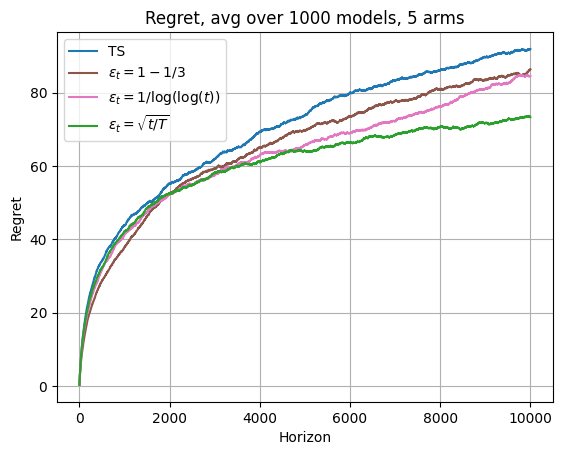

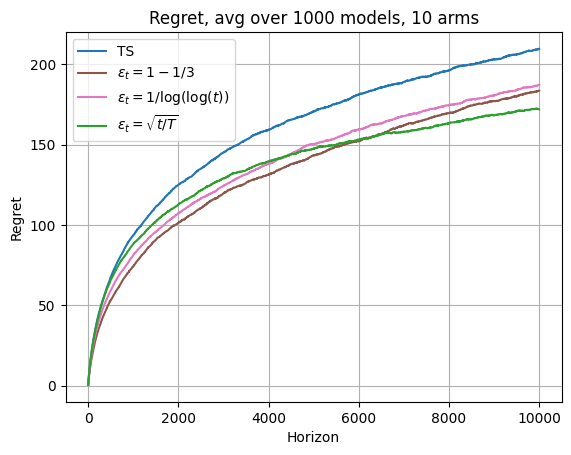

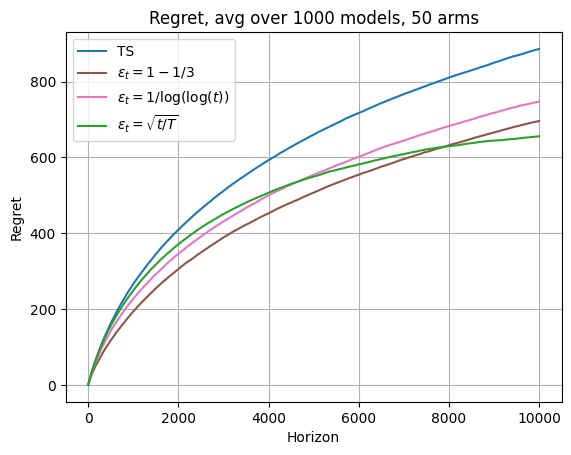

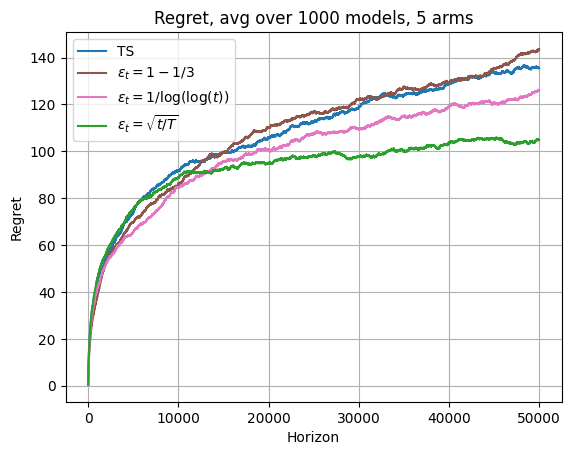

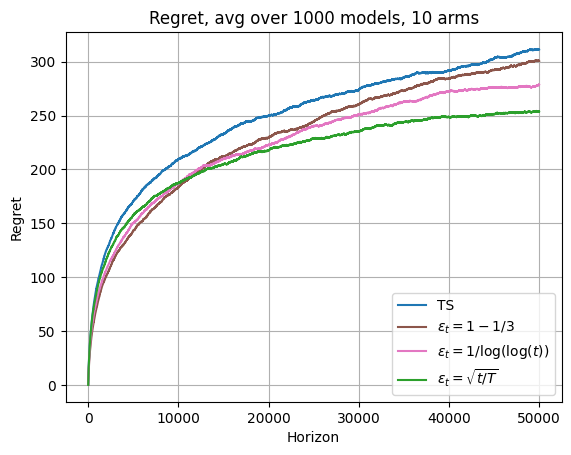

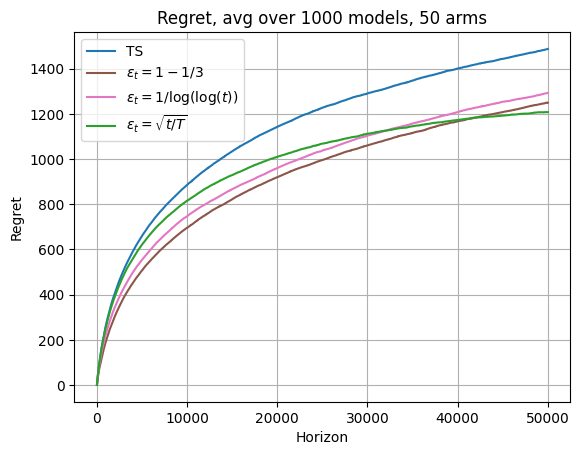

In [3]:
## Plotting average over models

##### Policy with K=[5,10,50] arms, T=[10000,50000], seed = 1000, models =2

import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import beta 
import scipy.stats as sst
import scipy.optimize
import scipy.special
import scipy.integrate as integrate
import time
import pandas as pd
from pathlib import Path
import glob as gl
import os
##########################################################################

# np.set_printoptions(precision=2,suppress=True)

num_arms = 50
hz = 50000
horizon = range(hz)

tot_seed_vals = 1000
seed_values = range(0,tot_seed_vals)
# tot_seed_vals = np.size(seed_values)

num_models = 2 #int(input('Enter the #models : '))#4
# num_arms = 5 #int(input('Enter the #arms : '))
#arms_instances_file = open('i-3.txt','r')
#arms_instances = np.loadtxt(arms_instances_file)

alg_names_to_run = ['thom_samp_alg','e_third_TS_alg','eTS_alg','eTS_finiteDecay_alg']#''

algo_plot_pars = { 'thom_samp_alg' : ('C0','TS'),'eTS_alg' : ('C6','$ \epsilon_t = 1/\log(\log(t))$'),
                      'e_const_TS_alg' : ('C1','$ \epsilon_t = 1 - 1/K$'),
                      'eTS_finiteDecay_alg' : ('C2','$ \epsilon_t = \sqrt{t/T} $'),
                      'e_third_TS_alg' : ('C5','$ \epsilon_t = 1-1/3 $')} 


 
# 
# hz = 10000 #int(input('Enter the horizon : '))


# num_arms = 50
num_models = 1000
# hz = 50000
# horizon = range(hz)

tot_seed_vals = 1
seed_values = range(0,tot_seed_vals)
# tot_seed_vals = np.size(seed_values)
# regret_df = pd.DataFrame(np.round(np.sum(regret_seed,0)/tot_seed_vals,decimals=2),hor_names)
# for model_chosen in range(num_models):
# model_chosen = 0
# csv_file_name  = Path(parent_folder_name,alg_name,"regret_" + alg_name + "_model_" + str(model_chosen) + ".csv")
# regret_df = pd.read_csv(csv_file_name).to_numpy()

# print(regret_df[:,1:])

# all_csv_file_names = gl.glob(os.path.join(parent_folder_name,alg_name,"*.csv"))
# list_df = []
#             for model_chosen in range(num_models): #in all_csv_file_names:
#                 # print(f)
#                 csv_file_name  = Path(parent_folder_name,alg_name,"regret_" + alg_name + "_model_" + str(model_chosen) + ".csv")
#                 # print(csv_file_name)
#                 regret_df = pd.read_csv(csv_file_name, index_col=0, header=None).T
#                 # print(regret_df)
#                 list_df.append(regret_df)

for hz in [10000,50000]:
    for num_arms in [5,10,50]:

        fig, ax = pl.subplots()
        end_time = hz
        horizon = np.linspace(1,end_time,num=end_time,dtype=int)

        for alg_name in alg_names_to_run:
            parent_folder_name = "horizon_" + str(hz)+ "_arms_" + str(num_arms) + "_seed_" + str(tot_seed_vals) + "_models_" + str(num_models)
            folder_name = Path(parent_folder_name, alg_name)
        
        
            # new_df = pd.DataFrame()
            # new_df = pd.concat(list_df,axis=0)#,ignore_index=True)
            csv_file_name  = Path(parent_folder_name,alg_name,"regret_" + alg_name + "_models_" + str(1000) + ".csv")
            regret_df = pd.read_csv(csv_file_name).to_numpy()

            # print(new_df)
            regret_avg_seeds = np.sum(regret_df[:,2:],0)/num_models
            
            # # # regret_every_step_arms_TS += regret_TS_model_list[model_chosen]/num_models
            ax.plot(horizon,regret_avg_seeds,color=algo_plot_pars[alg_name][0],label=algo_plot_pars[alg_name][1])

        ax.legend()
        ax.grid()
        ax.set_title('Regret, avg over '+ str(num_models)+ ' models, '  + str(num_arms) + ' arms')
        ax.set_xlabel('Horizon')
        ax.set_ylabel('Regret')
        pl.savefig('regret_poisson_horizon_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(num_models) + '_models' + '.eps')
        
        # num_models = len(regret_eTS_model_list)
        # if num_models:
        #     regret_every_step_arms_eTS = 0
        #     for model_chosen in range(num_models):
        #         regret_every_step_arms_eTS += regret_eTS_model_list[model_chosen]/num_models
        #     # regret_every_step_arms_eTS = regret_eTS_model_list[model_chosen]/num_models
        #     ax.plot(horizon,regret_every_step_arms_eTS[0:end_time],color=algo_plot_pars['eTS'][0],label=algo_plot_pars['eTS'][1])
        
        # num_models = len(regret_eTS_finiteDecay_model_list)
        # if num_models: 
        #     regret_every_step_arms_eTS_finiteDecay = 0
        #     for model_chosen in range(num_models):
        #         regret_every_step_arms_eTS_finiteDecay += regret_eTS_finiteDecay_model_list[model_chosen]/num_models
        #     # regret_every_step_arms_eTS_finiteDecay = regret_eTS_finiteDecay_model_list[model_chosen]/num_models
        #     ax.plot(horizon,regret_every_step_arms_eTS_finiteDecay[0:end_time],color=algo_plot_pars['eTS_finiteDecay'][0],label=algo_plot_pars['eTS_finiteDecay'][1])
        
        # num_models = len(regret_e_const_TS_model_list)
        # if num_models:
        #     regret_every_step_arms_e_const_TS = 0
        #     for model_chosen in range(num_models):
        #         regret_every_step_arms_e_const_TS += regret_e_const_TS_model_list[model_chosen]/num_models
        #     # regret_every_step_arms_e_const_TS = regret_e_const_TS_model_list[model_chosen]/num_models
        #     ax.plot(horizon,regret_every_step_arms_e_const_TS[0:end_time],color=algo_plot_pars['e_const_TS'][0],label=algo_plot_pars['e_const_TS'][1])
        
        # num_models = len(regret_e_third_TS_model_list)
        # if num_models:
        #     regret_every_step_arms_e_third_TS = 0
        #     for model_chosen in range(num_models):
        #         regret_every_step_arms_e_third_TS += regret_e_third_TS_model_list[model_chosen]/num_models
        #     # regret_every_step_arms_e_third_TS = regret_e_third_TS_model_list[model_chosen]/num_models
        #     ax.plot(horizon,regret_every_step_arms_e_third_TS[0:end_time],color=algo_plot_pars['e_third_TS'][0],label=algo_plot_pars['e_third_TS'][1])
        
        # ax.legend()
        # ax.grid()
        # ax.set_title('Regret, avg over '+ str(num_models)+ ' models, '  + str(num_arms) + ' arms')
        # pl.savefig('regret_bernoulli_horizon_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(num_models) + '_models' + '.eps')
        # # + str(num_models) +' models, '
        
        


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

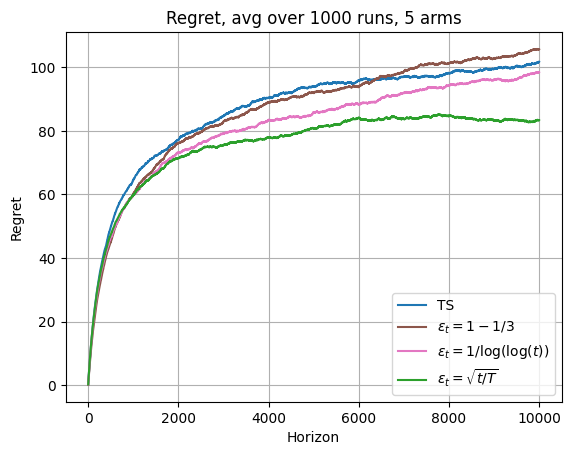

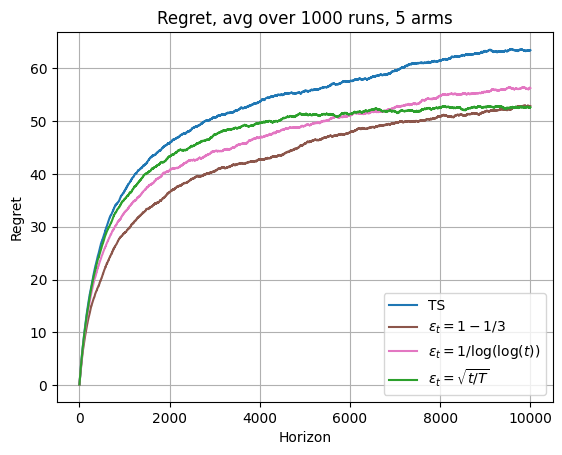

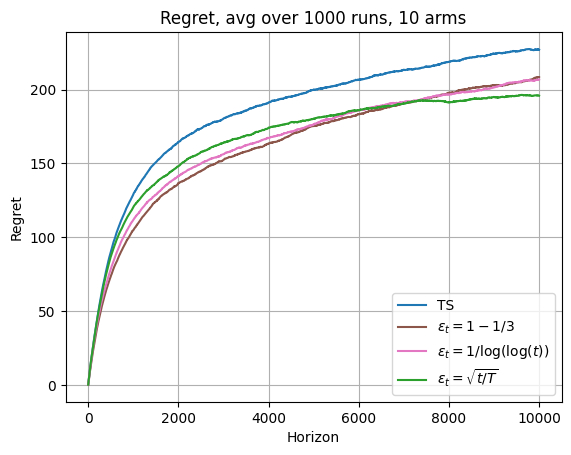

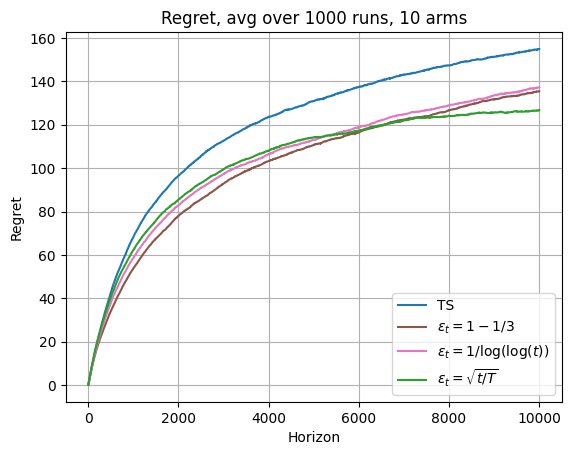

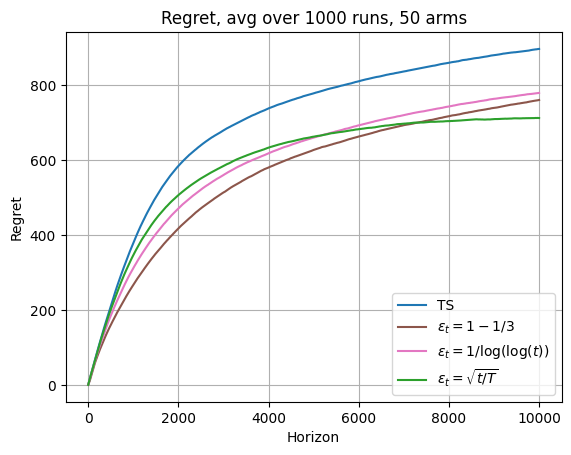

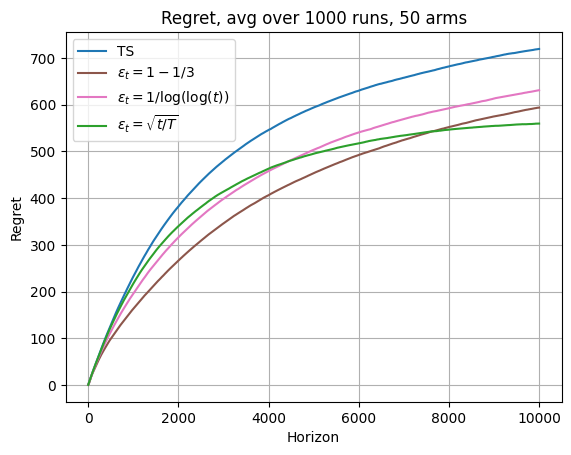

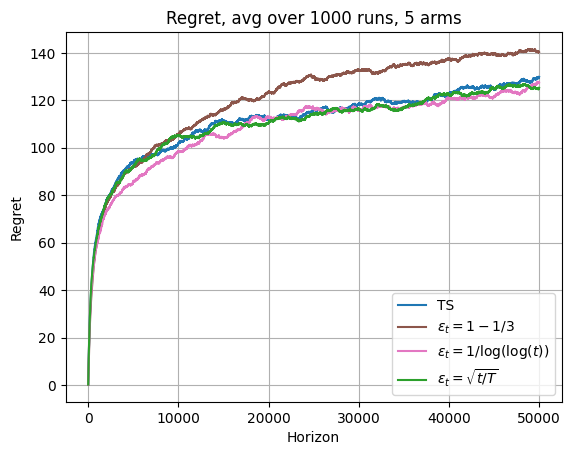

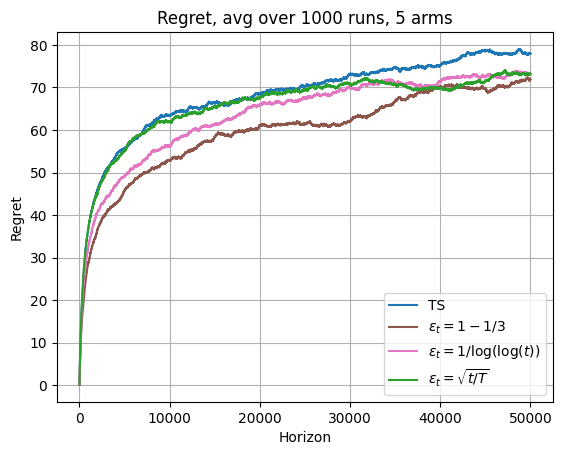

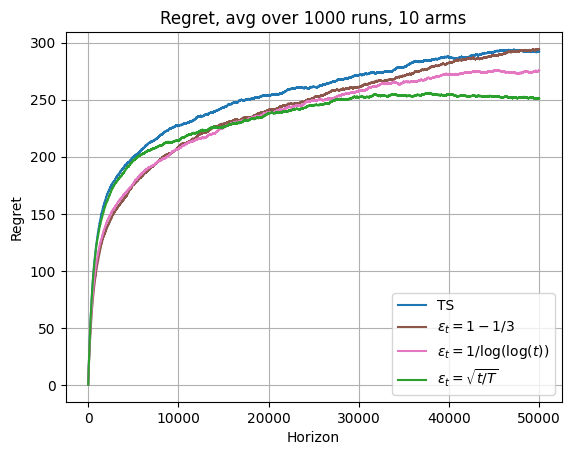

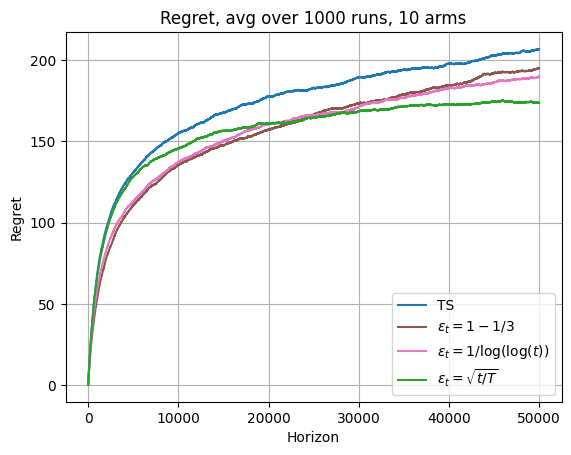

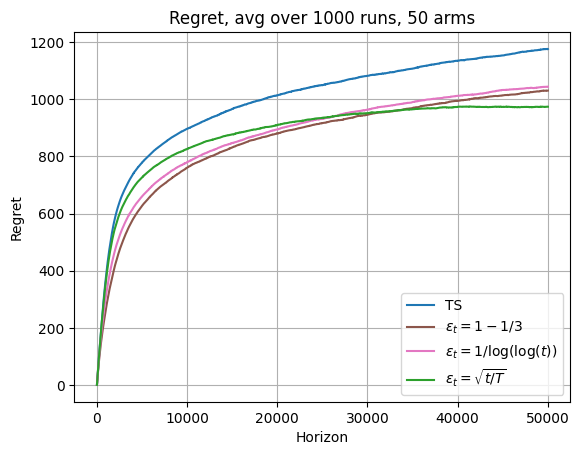

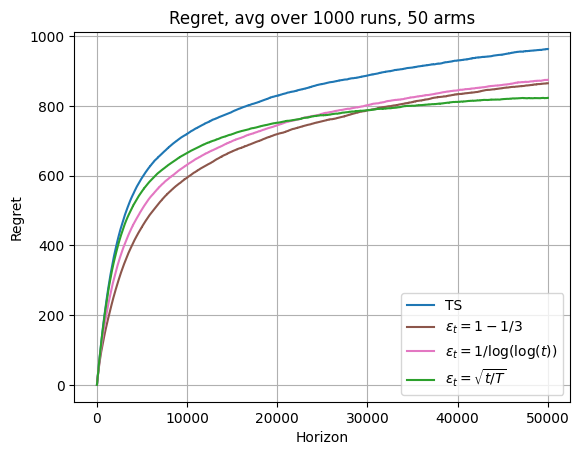

In [4]:
num_models = 2
# hz = 50000
# horizon = range(hz)

tot_seed_vals = 1000
seed_values = range(0,tot_seed_vals)

for hz in [10000,50000]:
    for num_arms in [5,10,50]:
        for model_chosen in [0,1]:

            fig, ax = pl.subplots()
            end_time = hz
            horizon = np.linspace(1,end_time,num=end_time,dtype=int)
    
            for alg_name in alg_names_to_run:
                parent_folder_name = "horizon_" + str(hz)+ "_arms_" + str(num_arms) + "_seed_" + str(tot_seed_vals) + "_models_" + str(num_models)
                folder_name = Path(parent_folder_name, alg_name)
            
            
                # new_df = pd.DataFrame()
                # new_df = pd.concat(list_df,axis=0)#,ignore_index=True)
                csv_file_name  = Path(parent_folder_name,alg_name,"regret_" + alg_name + "_model_" + str(model_chosen) + ".csv")
                regret_df = pd.read_csv(csv_file_name).to_numpy()
    
                # print(new_df)
                regret_avg_seeds = np.sum(regret_df[:,1:],0)/tot_seed_vals
                # print(regret_avg_seeds)
                # # # regret_every_step_arms_TS += regret_TS_model_list[model_chosen]/num_models
                ax.plot(horizon,regret_avg_seeds,color=algo_plot_pars[alg_name][0],label=algo_plot_pars[alg_name][1])
    
            ax.legend()
            ax.grid()
            ax.set_title('Regret, avg over '+ str(tot_seed_vals)+ ' runs, '  + str(num_arms) + ' arms')
            ax.set_xlabel('Horizon')
            ax.set_ylabel('Regret')
            pl.savefig('regret_poisson_horizon_'+ str(end_time) +'_' + str(num_arms) + 'arms_' + str(tot_seed_vals)+ 'seed_' + str(model_chosen) + '_models' + '.eps')
            


In [6]:
%reset -f